In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io
import os

dZ_dt_max: 0.515144452720051
Z0: 125.27235901422732
Heart Rate: 74 bpm
Stroke Volume: 16 mL
Cardiac Output: 1 L


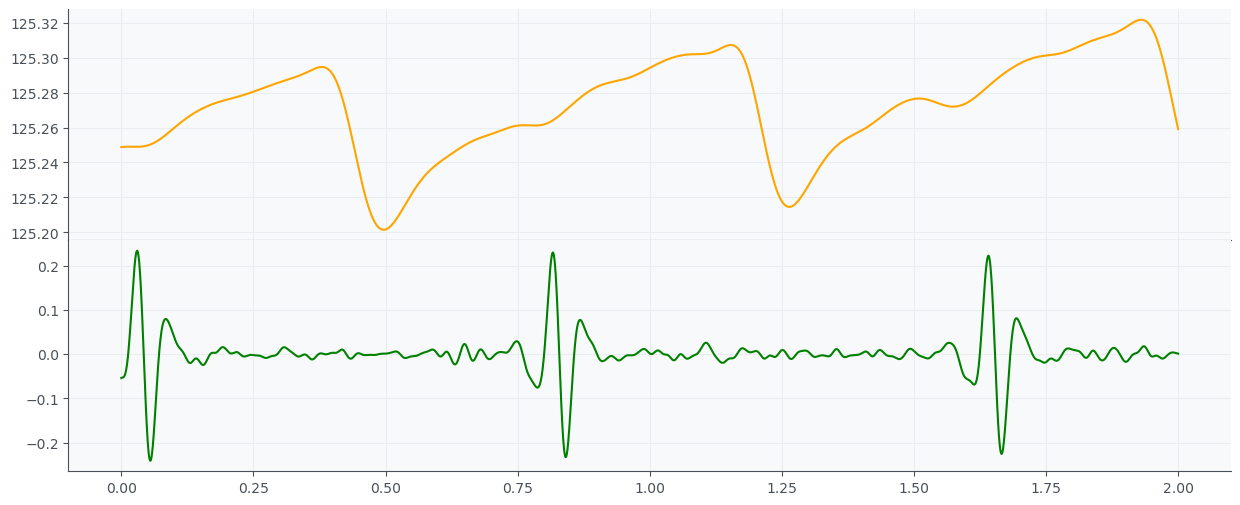

In [340]:
R1 = scipy.io.loadmat('C:\COCHE_Project\MMBP\data\MMData\\23\processed_rest1.mat')
r1 = R1['processed_rest1']
CT = scipy.io.loadmat('C:\COCHE_Project\MMBP\data\MMData\\23\processed_ct.mat')
ct = CT['processed_ct']
fs = 2000
r1 = ct
## Calculate r1, 20s-80s
begin = 38*fs
sigLen = 2
ecg = r1[0, begin:(begin+fs*sigLen)]
ipg = r1[3, (begin +(3*fs)):(begin+(3*fs)+fs*sigLen)]

'''signal_min = ipg.min()
signal_max = ipg.max()
ipg = (ipg - signal_min) / (signal_max - signal_min)'''
lowcut=10.0
highcut=50.0
order=4
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)
ecg = signal.filtfilt(b, a, ecg)

#plt.plot(ipg)

# Step 1: Calculate Heart Rate from ECG
peaks, _ = signal.find_peaks(ecg, distance=fs*0.6)  # Basic R-peak detection
peak_intervals = np.diff(peaks) / fs  # Time between peaks in seconds
heart_rate = 60 / np.mean(peak_intervals)  # Beats per minute
ecgT = np.linspace(0, sigLen, sigLen*fs)
'''plt.figure(figsize=(10, 4))
plt.plot(ecgT, ecg, label='ECG Signal')
plt.plot(ecgT[peaks], ecg[peaks], "x", label='R-peaks', color='red')
#plt.title('ECG Signal with Detected R-peaks (5-second interval)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()'''
# Step 2: Process ICG Data
# Calculate dZ/dt (rate of change of impedance)
dZ_dt = np.diff(ipg) * fs  # Derivative of Z wrt time
dZ_dt_max = np.max(dZ_dt)  # Max rate of change
print(f'dZ_dt_max: {dZ_dt_max}')
# Baseline impedance (Z0) approximation
Z0 = np.mean(ipg)
#Z0 = (max(ipg) - min(ipg)) / 2
print(f'Z0: {Z0}')
# Kubicek formula parameters (L is a patient-specific constant, you might need to adjust it)
L = 70  # Example value in meters

# Stroke Volume estimation using simplified Kubicek formula
#SV = L * dZ_dt_max / (Z0 * np.sqrt(heart_rate / sigLen))
SV = 130 * L * L * dZ_dt_max * np.mean(peak_intervals) / (Z0 * Z0)
CO = SV * heart_rate / 1000
print(f"Heart Rate: {int(heart_rate)} bpm")
print(f"Stroke Volume: {int(SV)} mL")
print(f"Cardiac Output: {int(CO)} L")

fig, axs = plt.subplots(2, 1, figsize=(15, 6))

# Plot on the first subplot
axs[0].plot(ecgT, ipg, color='orange')
#axs[0].set_title('First Plot')

# Plot on the second subplot
axs[1].plot(ecgT, ecg, color='green')
#axs[1].set_title('Second Plot')

# Adjust layout
#plt.tight_layout()
'''for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)'''

# Adjust space between subplots
plt.subplots_adjust(hspace=0)
# Show the plot
plt.show()